# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | canitas
City not found. Skipping...
Processing Record 5 of Set 1 | the valley
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | letnica
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | naco
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | san jose
Processing Record 15 of Set 1 | alghero
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | tunghsiao
City not found. Skipping...
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,28.14,77,96,4.49,KI,1682768152
1,nikolskoye,59.7035,30.7861,7.94,57,88,3.74,RU,1682768152
2,jamestown,42.0970,-79.2353,8.73,90,100,5.14,US,1682768152
3,the valley,18.2170,-63.0578,28.39,94,40,3.60,AI,1682768152
4,khatanga,71.9667,102.5000,-2.03,92,100,5.86,RU,1682768152


In [7]:
# Export the City_Data into a csv (python_api_challenge/output_data/cities.csv)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,28.14,77,96,4.49,KI,1682768152
1,nikolskoye,59.7035,30.7861,7.94,57,88,3.74,RU,1682768152
2,jamestown,42.0970,-79.2353,8.73,90,100,5.14,US,1682768152
3,the valley,18.2170,-63.0578,28.39,94,40,3.60,AI,1682768152
4,khatanga,71.9667,102.5000,-2.03,92,100,5.86,RU,1682768152


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

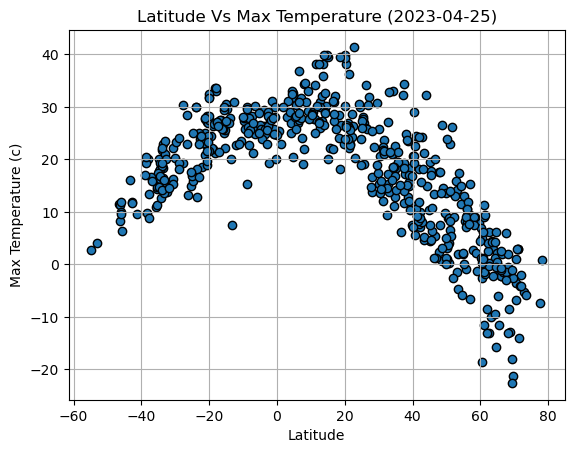

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title("Latitude Vs Max Temperature (2023-04-25)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

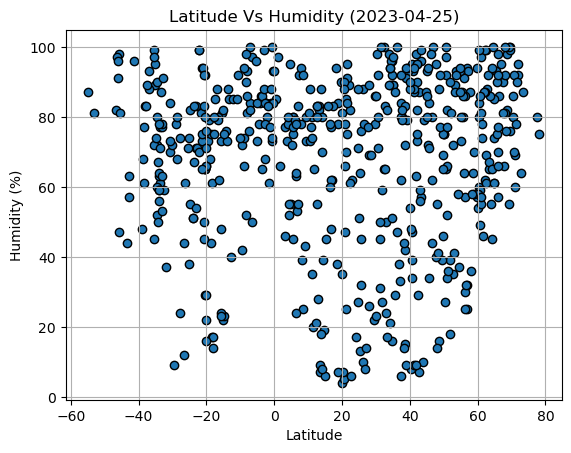

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title("Latitude Vs Humidity (2023-04-25)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

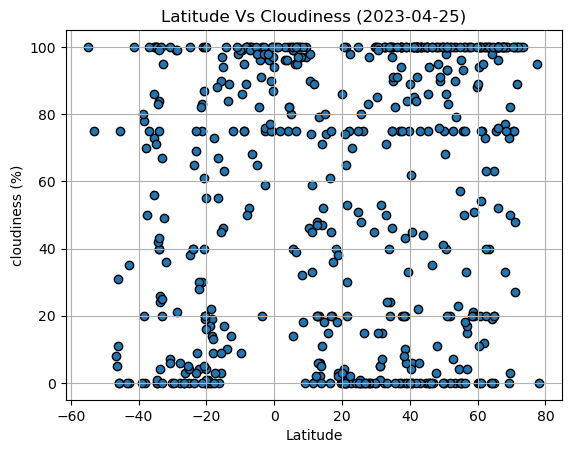

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title("Latitude Vs Cloudiness (2023-04-25)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

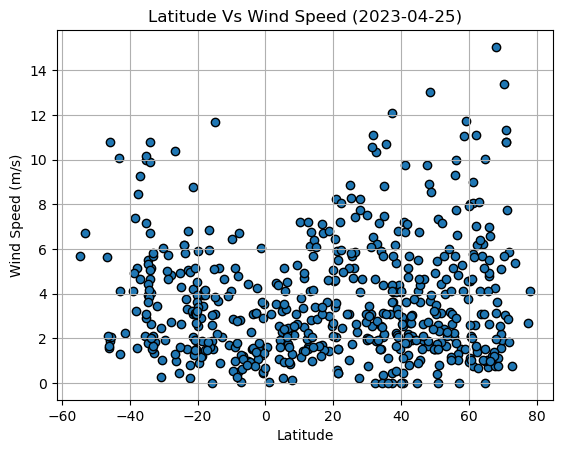

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title("Latitude Vs Wind Speed (2023-04-25)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regres_plot(x_value, y_value, xline=0,yline=0):
    
    # Calculate linear regression equation and line
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Building scatter plot
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, 'r-')
    plt.annotate(line_eq, (xline, yline), fontsize= 14, color= 'red')

    # Display r squared value and scatter plot graph
    print("The r-value is : " + str(rvalue**2))  


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,28.14,77,96,4.49,KI,1682768152
1,nikolskoye,59.7035,30.7861,7.94,57,88,3.74,RU,1682768152
2,jamestown,42.0970,-79.2353,8.73,90,100,5.14,US,1682768152
3,the valley,18.2170,-63.0578,28.39,94,40,3.60,AI,1682768152
4,khatanga,71.9667,102.5000,-2.03,92,100,5.86,RU,1682768152


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,bluff,-46.6000,168.3333,11.56,82,8,5.65,NZ,1682768152
8,vaini,-21.2000,-175.2000,25.09,94,75,3.09,TO,1682768153
14,atuona,-9.8000,-139.0333,27.39,74,9,6.45,PF,1682768154
15,rikitea,-23.1203,-134.9692,25.04,71,69,3.31,PF,1682768154
17,kununurra,-15.7667,128.7333,24.99,73,90,0.00,AU,1682768154


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.742432853459522


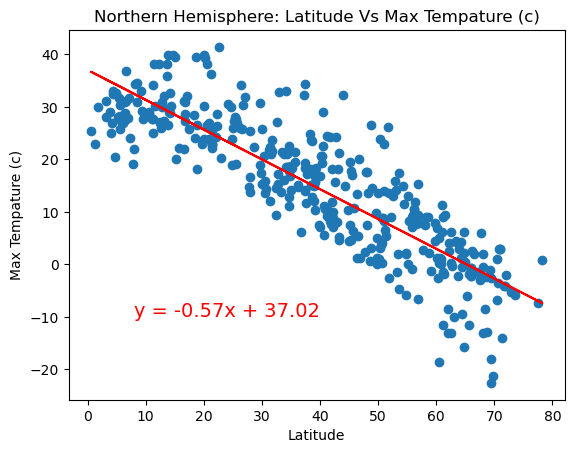

In [27]:
# Linear regression on Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Tempature (c)')
plt.title('Northern Hemisphere: Latitude Vs Max Tempature (c)')

# call linear_regres_plot function , passing northern_hemisphere Latitude, Max Temp  with x, y postion for line equation
linear_regres_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 8, -10)

The r-value is : 0.5200411460483157


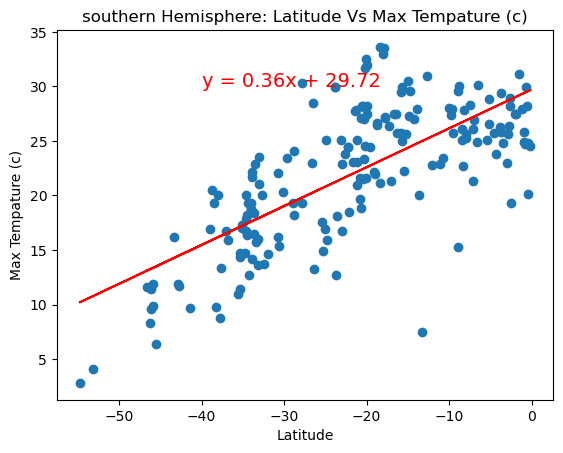

In [28]:
# Linear regression on Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Tempature (c)')
plt.title('southern Hemisphere: Latitude Vs Max Tempature (c)')

# call linear_regres_plot function , passing southern hemisphere Latitude, Max Temp  with x, y postion for line equation
linear_regres_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -40, 30)

**Discussion about the linear relationship:** 
Northern Hemisphere: Inverse Correlation between Latitude and Max Temperature. clearly, higher the Latitude lower the Max.temperature.

Southern Hemisphere: Correlation between Latitude and Max Temperature. Higher the Latitude shows increasing temperatures(Max Temp).

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.037770750078213004


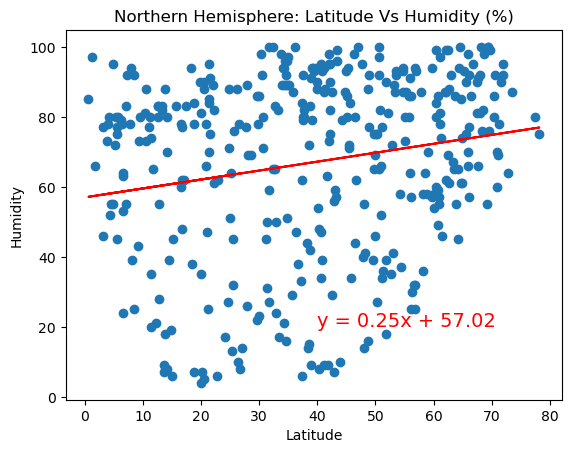

In [38]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Latitude Vs Humidity (%)')

# call linear_regres_plot function , passing northern_hemisphere Latitude, Humidity  with x, y postion for line equation
linear_regres_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 40, 20)

The r-value is : 0.008597182493403709


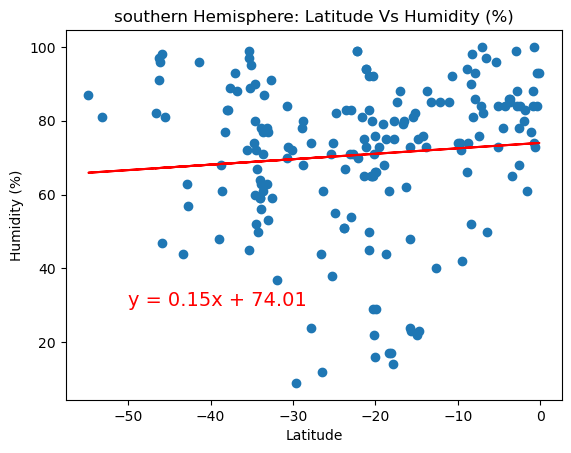

In [36]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('southern Hemisphere: Latitude Vs Humidity (%)')

# call linear_regres_plot function , passing southern hemisphere Latitude, Humidity  with x, y postion for line equation
linear_regres_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -50, 30)

**Discussion about the linear relationship:** 
There is no strong correlation found in both Northern and Southern Hemispheres.

They are scattered randomly , no relationships found between Latitude and Humidity !

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.015503529189326449


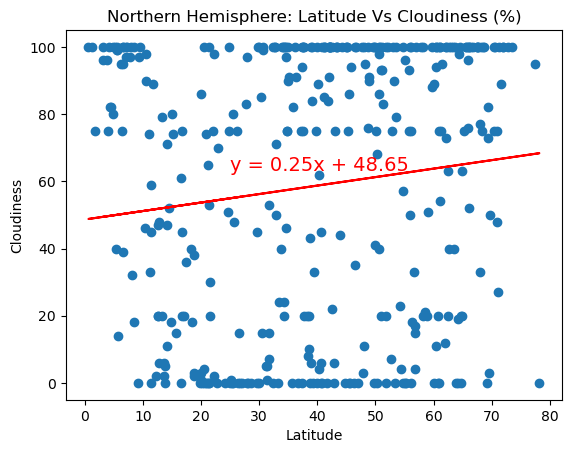

In [42]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Latitude Vs Cloudiness (%)')

# call linear_regres_plot function , passing northern_hemisphere Latitude, Cloudiness with x, y postion for line equation
linear_regres_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 25, 63)

The r-value is : 0.11606001096813152


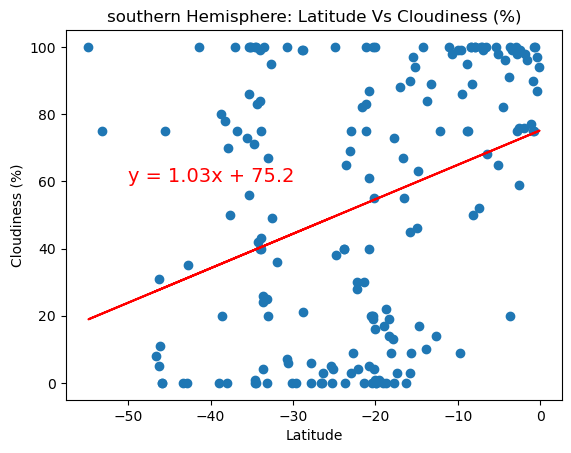

In [44]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('southern Hemisphere: Latitude Vs Cloudiness (%)')

# call linear_regres_plot function , passing southern hemisphere Latitude, Cloudiness with x, y postion for line equation
linear_regres_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -50, 60)

**Discussion about the linear relationship:** 
They are scattered randomly, No strong correlation found in Northern Hemisphere.
There is Mild Positive correlation found between Latitude and Cloudiness in Southern Hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.015543991093911283


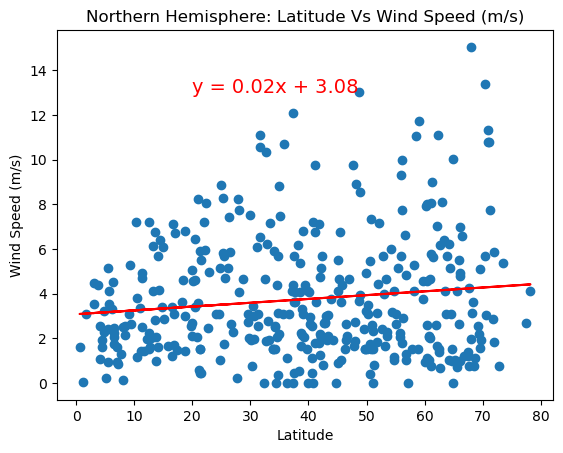

In [59]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: Latitude Vs Wind Speed (m/s)')

# call linear_regres_plot function , passing northern_hemisphere Latitude, Wind Speed with x, y postion for line equation
linear_regres_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 20, 13)

The r-value is : 0.13236105696166708


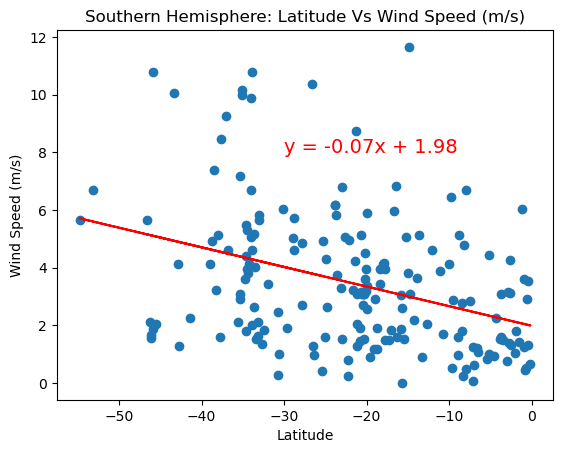

In [60]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: Latitude Vs Wind Speed (m/s)')

# call linear_regres_plot function , passing Southern_hemisphere Latitude, Wind Speed with x, y postion for line equation
linear_regres_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -30, 8)

**Discussion about the linear relationship:** 
There is week  Positive correlation found in Northern Hemisphere.
There is week  Negative correlation found in Northern Hemisphere, increase in Latitude from negative towards 0 indicates decrease in wind speed.
